In [383]:
import pandas as pd

In [384]:
df = pd.read_excel("train.xlsx")

In [385]:
print(df.head(3))
print(df.info())

          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None


In [386]:
df = df.sort_values(by="dt")

In [387]:
import matplotlib as plt

<Axes: title={'center': 'Time series'}, xlabel='Date', ylabel='total'>

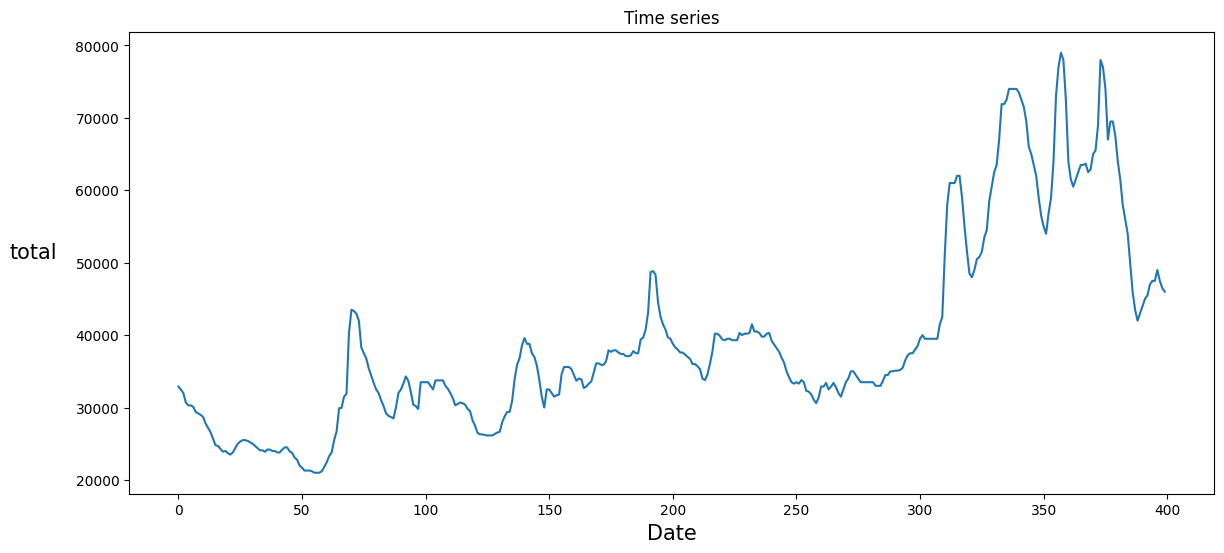

In [388]:
import matplotlib.pyplot as plt
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('Date', fontsize=15)
plt.ylabel('total', rotation=0, labelpad=30, fontsize=15)
df['Цена на арматуру'].plot()

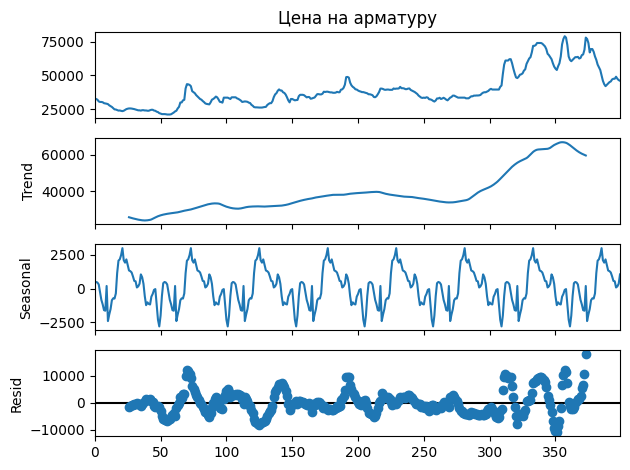

In [389]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Цена на арматуру'], model='additive', period=52)
result.plot()
plt.show()

In [390]:
from statsmodels.tsa.stattools import acf
acf(df['Цена на арматуру'], nlags=60, fft=False)

array([1.        , 0.99138242, 0.97367714, 0.95122039, 0.92740427,
       0.90357365, 0.88126621, 0.8606089 , 0.84235253, 0.82671727,
       0.81349611, 0.8020525 , 0.7925797 , 0.78508849, 0.78019657,
       0.77692922, 0.77376814, 0.76901294, 0.76227632, 0.75319077,
       0.74261145, 0.7309889 , 0.71862345, 0.7046383 , 0.68939965,
       0.67325908, 0.65612584, 0.63820561, 0.62109396, 0.60459259,
       0.58872289, 0.57435372, 0.56120831, 0.54900152, 0.5377084 ,
       0.5271632 , 0.51674918, 0.5068141 , 0.49691253, 0.48636205,
       0.47460061, 0.4600824 , 0.44257206, 0.42285538, 0.40223733,
       0.38033844, 0.35769402, 0.33517203, 0.31316745, 0.29306128,
       0.27522925, 0.2595102 , 0.24447201, 0.23086215, 0.21896621,
       0.20859445, 0.1993889 , 0.19088593, 0.18300826, 0.1757314 ,
       0.16880023])

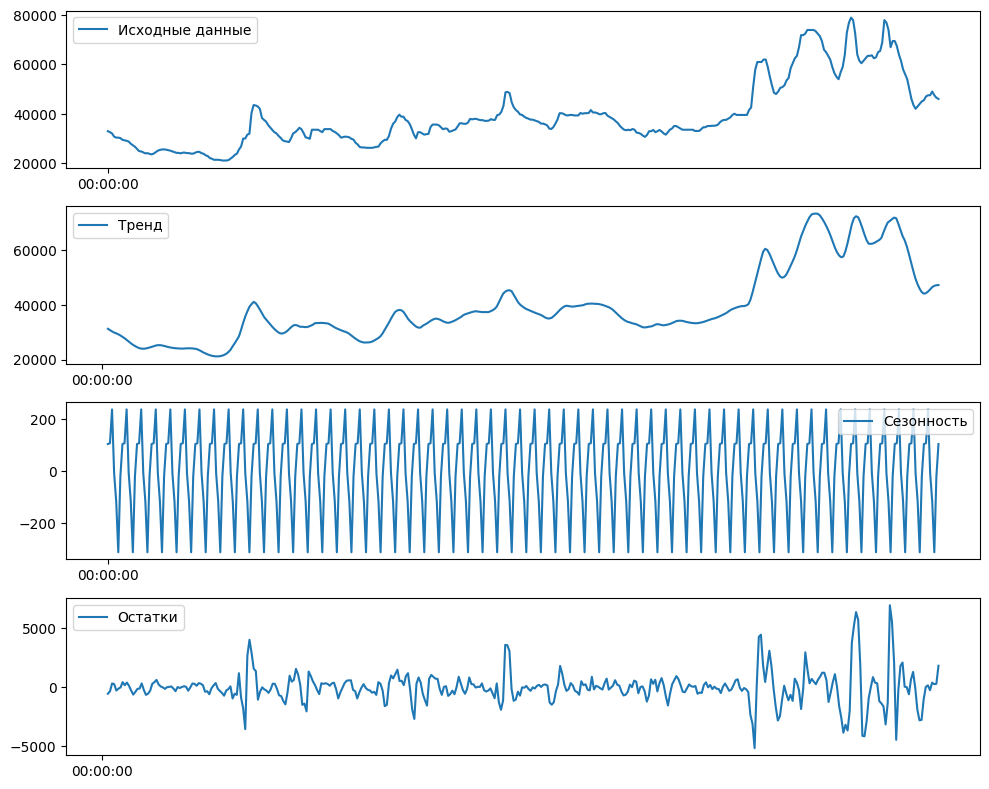

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


df.index = pd.to_datetime(df.index)

period = 7


result = seasonal_decompose(df["Цена на арматуру"], period=period, model="additive")

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df["Цена на арматуру"], label="Исходные данные")
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label="Тренд")
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label="Сезонность")
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label="Остатки")
plt.legend()

plt.tight_layout()
plt.show()

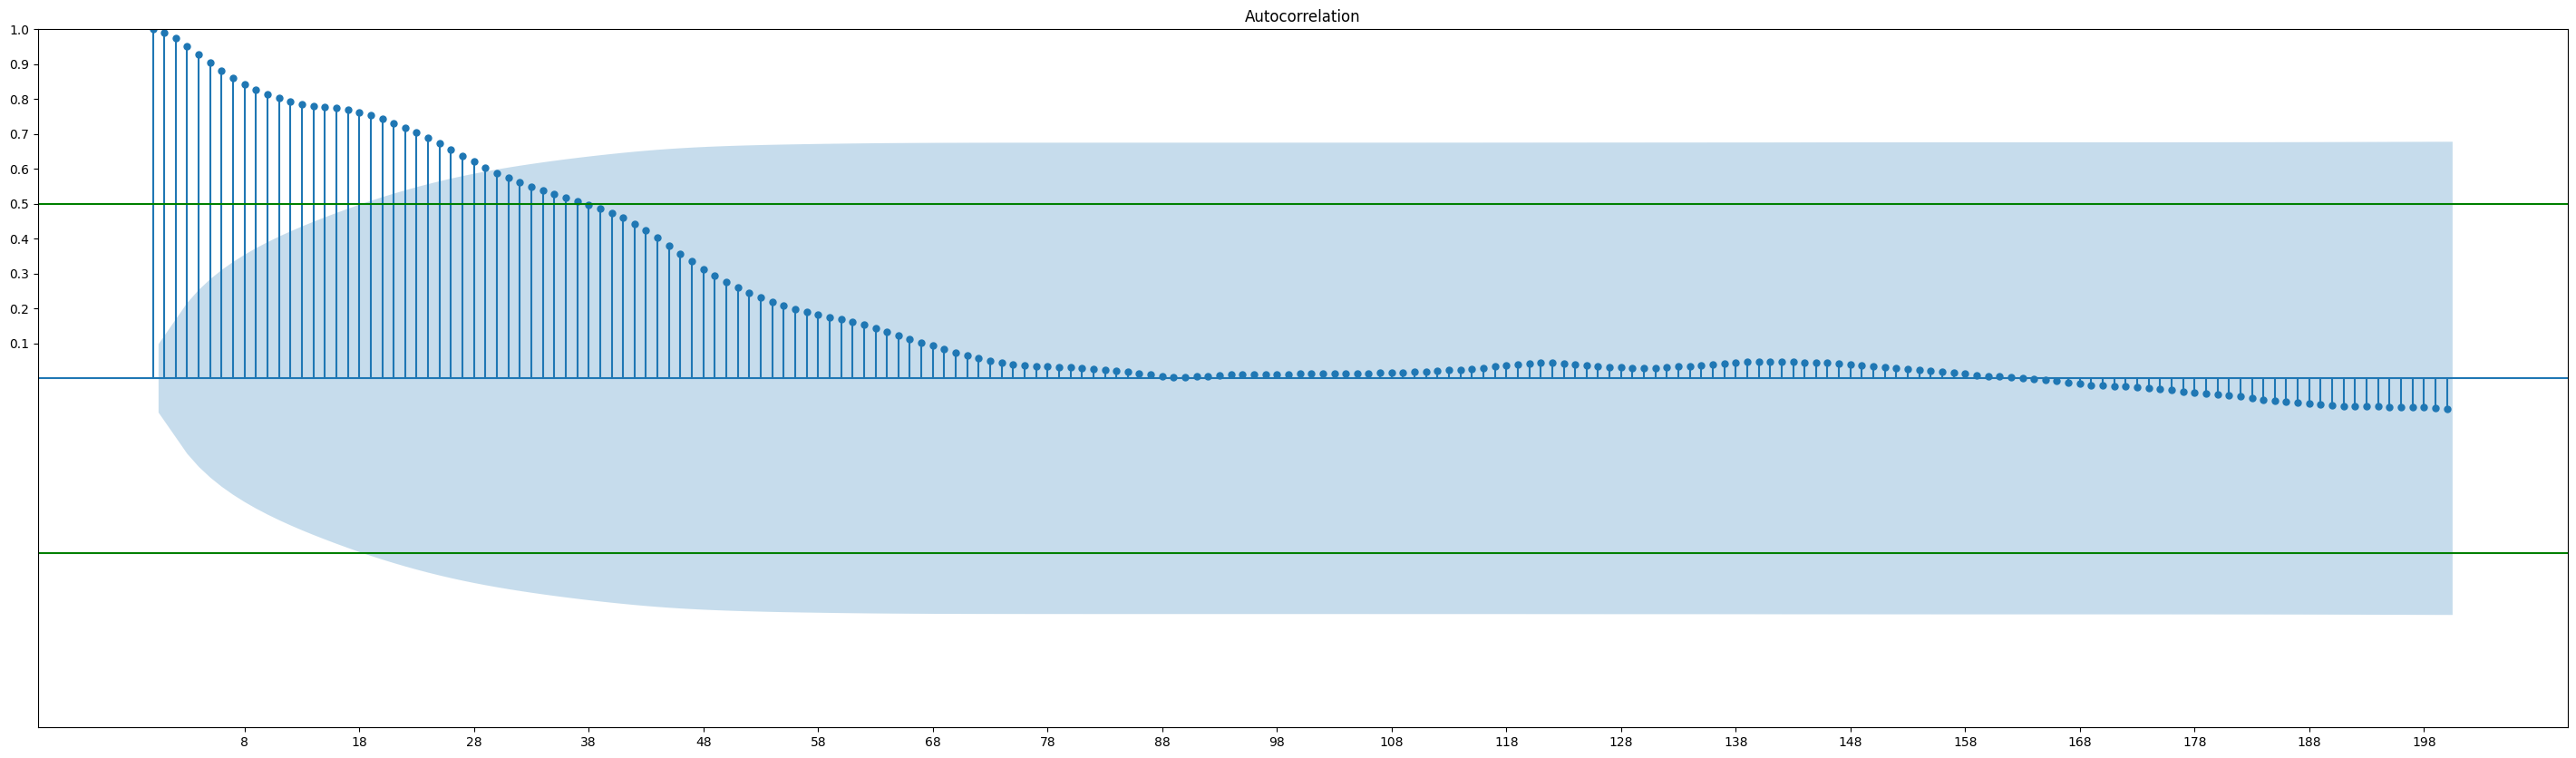

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
fig, ax = plt.subplots(figsize=(36,10))
plot_acf(df['Цена на арматуру'], lags=200, ax=ax)
# plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(8, 201, 10))
plt.axhline(y=0.5, color="green")
plt.axhline(y=-0.5, color="green")
plt.show()

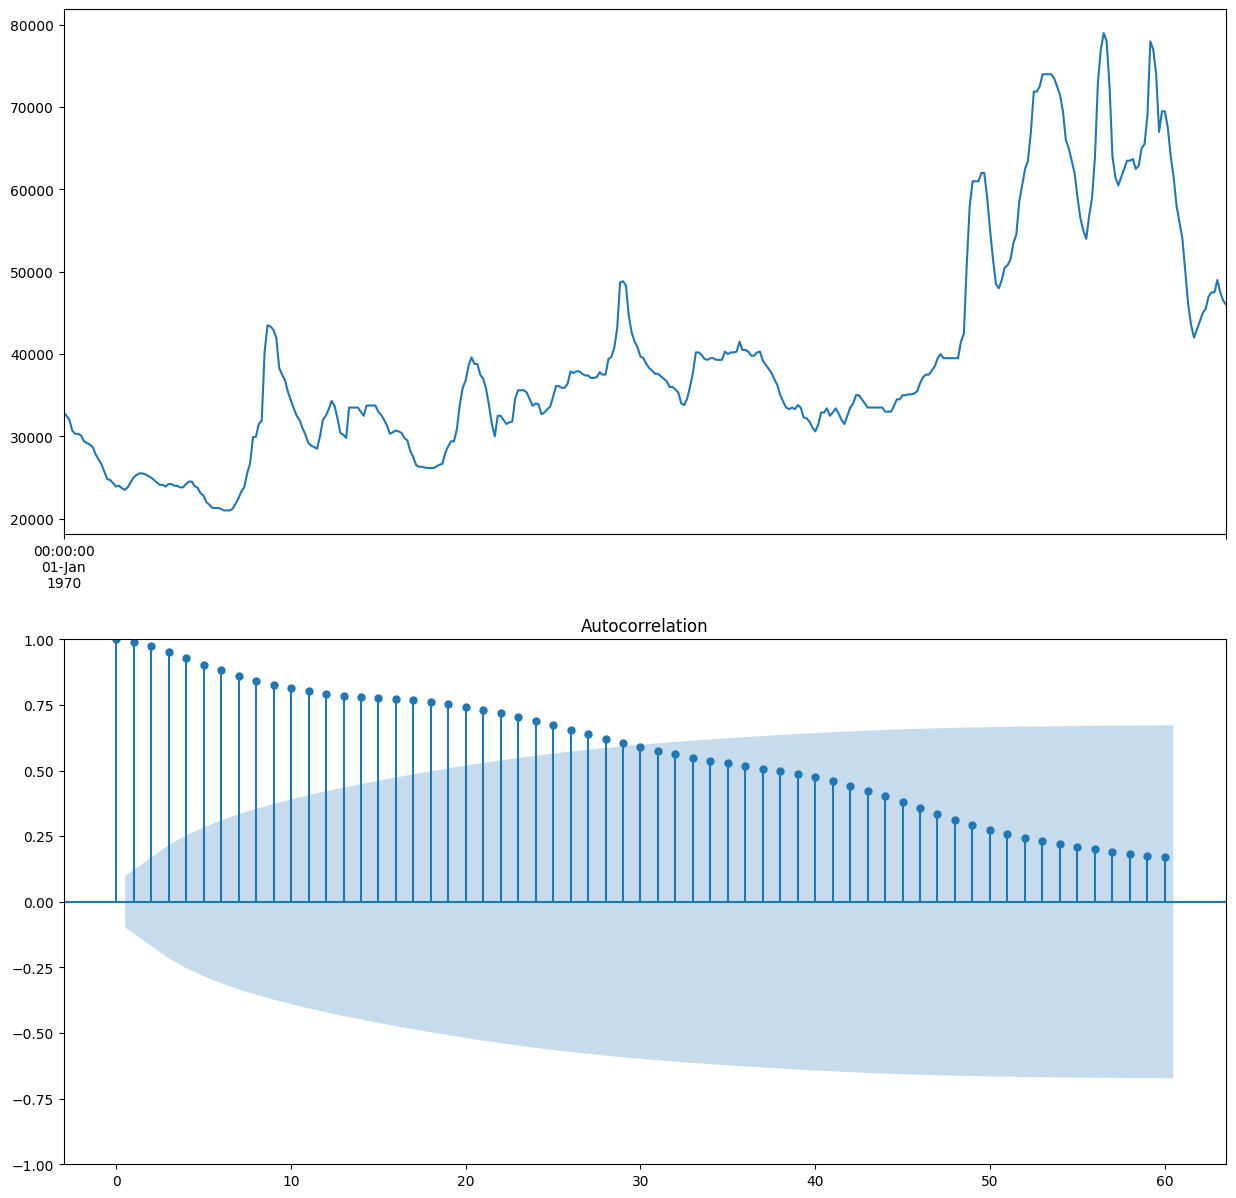

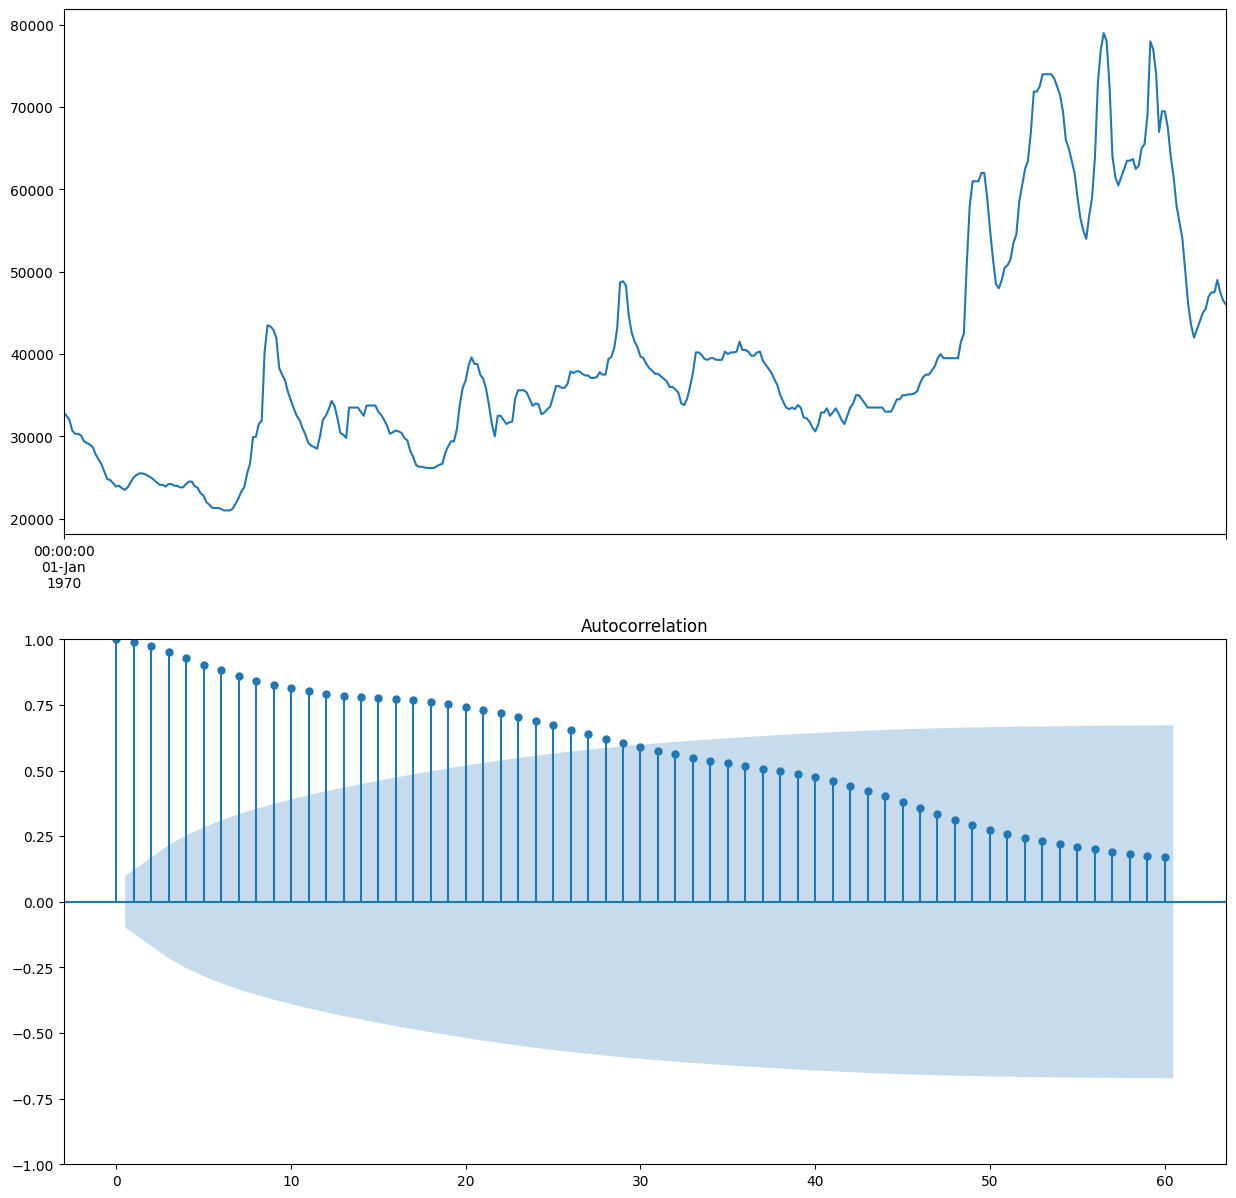

In [393]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
df['Цена на арматуру'].plot(ax=ax[0])
plot_acf(df['Цена на арматуру'], lags=60, ax=ax[1])

In [394]:
series = df["Цена на арматуру"].values


In [395]:
from statsmodels.tsa.ar_model import AutoReg
ar = AutoReg(series, lags=90).fit()

In [396]:
prediction = ar.predict(start=400, end=400+21, dynamic=False)

In [397]:
prediction

array([45411.13068832, 43274.23302541, 40640.3100115 , 38111.3170714 ,
       34319.52736416, 32007.85231374, 33243.77365645, 34038.45195432,
       38759.326775  , 42454.73168143, 43474.7022761 , 41072.9791221 ,
       39893.44889557, 38971.68330907, 40567.14504395, 40972.6706803 ,
       41481.88261463, 43394.47977632, 44816.71885526, 44413.34334711,
       40307.79077382, 35387.87429562])

In [398]:
sm = pd.read_excel("test.xlsx")

In [399]:
df_train = df["Цена на арматуру"].iloc[:-40]
df_test = df["Цена на арматуру"].iloc[-40:]
df_train.shape

(360,)

In [400]:
df_test.shape

(40,)

In [401]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [402]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df_train, lags=5).fit()

c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [403]:
forecasts = model.forecast(40).tolist()
test_values = df_test.tolist()

c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [404]:
print('R2 score:', r2_score(forecasts, df_test))

R2 score: -4.5645212414184275


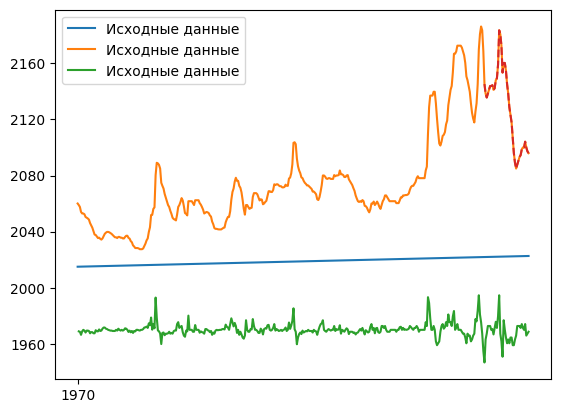

In [408]:
plt.plot(df, label="Исходные данные")
plt.plot(df_test, linestyle="dashed")
plt.legend()
plt.show()
   

c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


p-value: 0.3199906102569917
Ряд нестационарен, берём первую разность
Модель ARMA(2,2) — AIC: 6919.166290961061


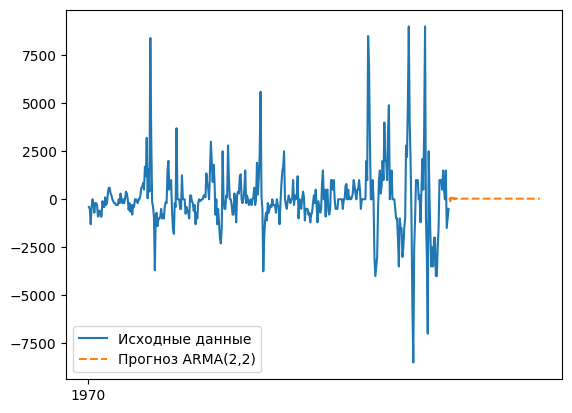

c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


Модель ARMA(3,1) — AIC: 6918.789191506542


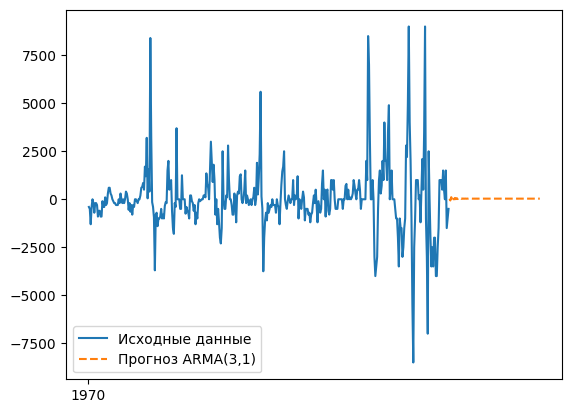

c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


Модель ARMA(1,3) — AIC: 6918.504602926362


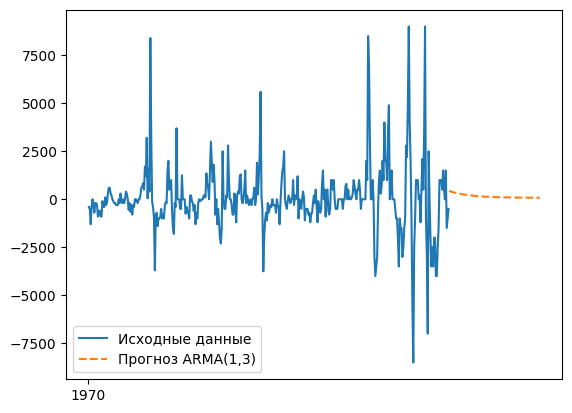

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Проверим стационарность данных (если не стационарны, нужно дифференцировать)
result = adfuller(df["Цена на арматуру"])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Ряд нестационарен, берём первую разность")
    df["total_diff"] = df["Цена на арматуру"].diff().dropna()
    data = df["total_diff"].dropna()
else:
    data = df["Цена на арматуру"]

# Функция для обучения и предсказания модели ARMA
def train_arma(p, q):
    model = ARIMA(data, order=(p, 0, q))  # d=0, так как данные уже стационарные
    model_fit = model.fit()
    print(f"Модель ARMA({p},{q}) — AIC: {model_fit.aic}")
    
    # Прогноз
    forecast = model_fit.predict(start=len(data), end=len(data) + 100)
    
    # Визуализация
    plt.plot(data, label="Исходные данные")
    plt.plot(forecast, label=f"Прогноз ARMA({p},{q})", linestyle="dashed")
    plt.legend()
    plt.show()
    
    return model_fit

# Обучаем 3 модели ARMA с разными параметрами
arma_1 = train_arma(2, 2)
arma_2 = train_arma(3, 1)
arma_3 = train_arma(1, 3)


c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\GitHub\3_intensiv_3\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
c:\Users\josha\OneDrive\Documents\Gi

Модель ARMA(1,1):
                               SARIMAX Results                                
Dep. Variable:       Цена на арматуру   No. Observations:                  400
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3486.820
Date:                Thu, 20 Mar 2025   AIC                           6981.640
Time:                        20:46:21   BIC                           6997.606
Sample:                    01-01-1970   HQIC                          6987.963
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.923e+04   1.12e+04      3.494      0.000    1.72e+04    6.12e+04
ar.L1          0.9856      0.007    133.480      0.000       0.971       1.000
ma.L1          0.4428      0.027  

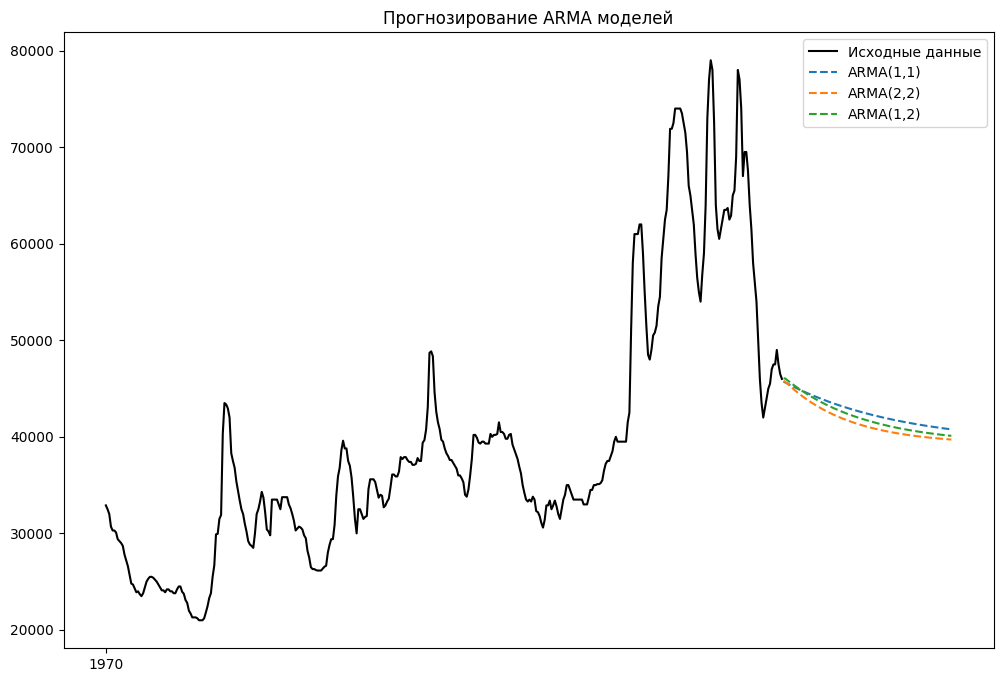

In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Предполагается, что DataFrame 'train' уже загружен, индекс – даты, а столбец с данными называется "total".
# Если индекс ещё не приведён к типу datetime, можно сделать так:
# train.index = pd.to_datetime(train.index)

# Построим 3 модели ARMA, используя ARIMA с параметром d=0 (т.е. без дифференцирования):

# Модель 1: ARMA(1,1)
model1 = ARIMA(df["Цена на арматуру"], order=(1, 0, 1))
results1 = model1.fit()
print("Модель ARMA(1,1):")
print(results1.summary())

# Модель 2: ARMA(2,2)
model2 = ARIMA(df["Цена на арматуру"], order=(2, 0, 2))
results2 = model2.fit()
print("\nМодель ARMA(2,2):")
print(results2.summary())

# Модель 3: ARMA(1,2)
model3 = ARIMA(df["Цена на арматуру"], order=(1, 0, 2))
results3 = model3.fit()
print("\nМодель ARMA(1,2):")
print(results3.summary())

# Опционально: визуализируем прогнозы на ближайшие 100 шагов для каждой модели
forecast_steps = 100

plt.figure(figsize=(12, 8))
plt.plot(df["Цена на арматуру"], label="Исходные данные", color='black')

forecast1 = results1.get_forecast(steps=forecast_steps)
forecast2 = results2.get_forecast(steps=forecast_steps)
forecast3 = results3.get_forecast(steps=forecast_steps)

plt.plot(forecast1.predicted_mean, label="ARMA(1,1)", linestyle="--")
plt.plot(forecast2.predicted_mean, label="ARMA(2,2)", linestyle="--")
plt.plot(forecast3.predicted_mean, label="ARMA(1,2)", linestyle="--")
plt.title("Прогнозирование ARMA моделей")
plt.legend()
plt.show()